In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from scipy.spatial.distance import cdist

In [2]:
class Kmeans():
    def __init__(self):
        pass
    
    def RandomInit(self, X, K):
        """
        Pick K nonoverlaping training examples from shuffled 
        dataset X to be initial coordinates of centroids. 
        """
        idx = np.random.choice(np.arange(0,X.shape[0]),
                                    K, replace=False)
        X_copy = X
        Y = X_copy[idx,:]
        return Y
    
    def FindClosestCenters(self, X, Y):
        """
        Return an 1xM array of labels corresponding to 
        the nearest centroid to each training example.
        
        Parameters:
        -----------
        X - MxN matrix of training examples
        Y - KxN matrix of centroid coordinates 
        """
        L = np.argmin(cdist(X, Y), axis=1)
        return L
    
    def AdjustCenters(self, X, K, L):
        """
        Assign centroids with new coordinates by 
        averaging across training examples with 
        same label. Returns KxN matrix of centroid
        coordinates.
        
        Parameters:
        -----------
        X - MxN matrix of training examples
        L - 1xM array of K unique labels assigned 
            to each example
        """
        Y = np.zeros((K, X.shape[1]))
        for i in range(K):
            Y[i,:] = np.mean(X[L==i], axis=0) 
        return Y
    
    def CompDistortion(self, X, K, L, Y):
        """
        Compute average distance between data points
        and cluster centers assigned to them.
        
        Parameter descriptions are the same as earlier.
        """
        m, n = X.shape
        distortions = np.zeros((m, K))
        for center in range(K):
            distortions = cdist(Y[center,:].reshape(1, n),
                                X[L==center,:])
        distortion = np.mean(distortions)
        return distortion
    
    def Train(self, X, K, it_max = 20, Y=None):
        """
        Train algorithm by iterative updating of dataset labels
        according to their closest cluster centers, then new 
        cluster centers are recomputed.
        
        Parameters:
        -----------
        it_max - maximum number of iterations of algorithm
        Y - (optional) user-defined initial coordinates of 
            cluster centers
        K - usert-defined number of clusters
        """
        centers = self.RandomInit(X, K) if Y is None else Y
        
        # These structures store history of clustering
        labels_hist = np.zeros((it_max, X.shape[0]))
        centers_hist = dict(zip(np.arange(K), centers))
        distort_hist = np.zeros(it_max)
        
        for i in range(it_max):
            labels = self.FindClosestCenters(X, centers)
            centers = self.AdjustCenters(X, K, labels)
            
            labels_hist[i,:] = labels
            distort_hist[i] = self.CompDistortion(X, K, 
                                            labels, centers)
            for key,val in centers_hist.items():
                if i >= 1:
                    centers_hist[key] = np.vstack((val, 
                                                   centers[key,:]))
                else:
                    centers_hist[key] = np.stack((val, 
                                                  centers[key,:]))
                
        history = [labels_hist, centers_hist, distort_hist]
        return history

In [3]:
def VisualizeClusters(X, history, K, it_max):
    distortion = history[2]
    centers = history[1]
    labels = history[0][-1]
    
    plt.plot(np.arange(it_max), distortion)
    plt.xlim((0, it_max))
    plt.xlabel("No. of iterations")
    plt.ylabel("Distortion")
    plt.title("Distortion for K = {}".format(K))
    plt.show()
    
    colors = ["red","blue","green"]
    for i in range(K):
        color = np.random.rand(3,)
        plt.scatter(X[labels==i,:][:,0], 
                    X[labels==i,:][:,1], c=colors[i])
        plt.plot(centers[i][:,0], centers[i][:,1], 'kx--')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("K-means algorithm results with K = {}".format(K)+
              "clusters \n after {} iterations".format(it_max))
    plt.show()

In [4]:
data = io.loadmat('data/data2.mat')
X = data['X']

In [5]:
K = 3
it_max = 10
model = Kmeans()
history = model.Train(X, K, it_max)

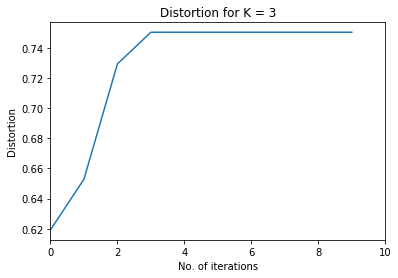

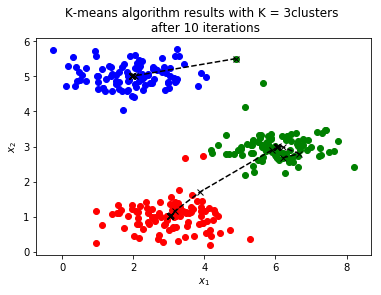

In [6]:
VisualizeClusters(X, history, K, it_max)